In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
use_columns = ["V0001","C008", "Q074","Q075"]

In [4]:
pns = pd.read_csv("pns2019.csv", usecols=use_columns)

In [5]:
pns

,V0001,C008,Q074,Q075
0,11,55.0,2.0,NaN
1,11,69.0,NaN,NaN
2,11,31.0,NaN,NaN
3,11,9.0,NaN,NaN
4,11,6.0,NaN,NaN
...,...,...,...,...
293721,53,49.0,NaN,NaN
293722,53,84.0,NaN,NaN
293723,53,21.0,NaN,NaN
293724,53,13.0,NaN,NaN


In [6]:
pns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V0001   293726 non-null  int64  
 1   C008    279382 non-null  float64
 2   Q074    90846 non-null   float64
 3   Q075    4467 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.0 MB


In [7]:
pns["Q074"].value_counts()

Q074
2.0    86379
1.0     4467
Name: count, dtype: int64

In [8]:
pns['Q074'] = pd.to_numeric(pns['Q074'], errors='coerce')

In [9]:
pns = pns.dropna(subset=['Q074'])

In [10]:
pns['C008'] = pns['C008'].astype(int)

/tmp/ipykernel_6751/1003792034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pns['C008'] = pns['C008'].astype(int)


In [11]:
pns

,V0001,C008,Q074,Q075
0,11,55,2.0,NaN
9,11,19,2.0,NaN
10,11,45,2.0,NaN
18,11,58,2.0,NaN
19,11,28,2.0,NaN
...,...,...,...,...
293709,53,54,2.0,NaN
293712,53,44,2.0,NaN
293713,53,32,2.0,NaN
293718,53,54,2.0,NaN


In [12]:
pns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90846 entries, 0 to 293720
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   90846 non-null  int64  
 1   C008    90846 non-null  int64  
 2   Q074    90846 non-null  float64
 3   Q075    4467 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 3.5 MB


In [13]:
mapeamento_estados = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [14]:
pns['V0001'] = pns['V0001'].map(mapeamento_estados)

/tmp/ipykernel_6751/271576639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pns['V0001'] = pns['V0001'].map(mapeamento_estados)


# Analise Atv 01

## Contagem por estado

In [15]:
contagem_estados = pns.groupby(['V0001', 'Q074']).size().unstack(fill_value=0)

In [16]:
contagem_estados

Q074,1.0,2.0
V0001,,
Acre,93,2287
Alagoas,116,2871
Amapá,93,1461
Amazonas,151,3328
Bahia,117,3542
Ceará,200,4065
Distrito Federal,120,2245
Espírito Santo,231,3310
Goiás,146,2556


[]

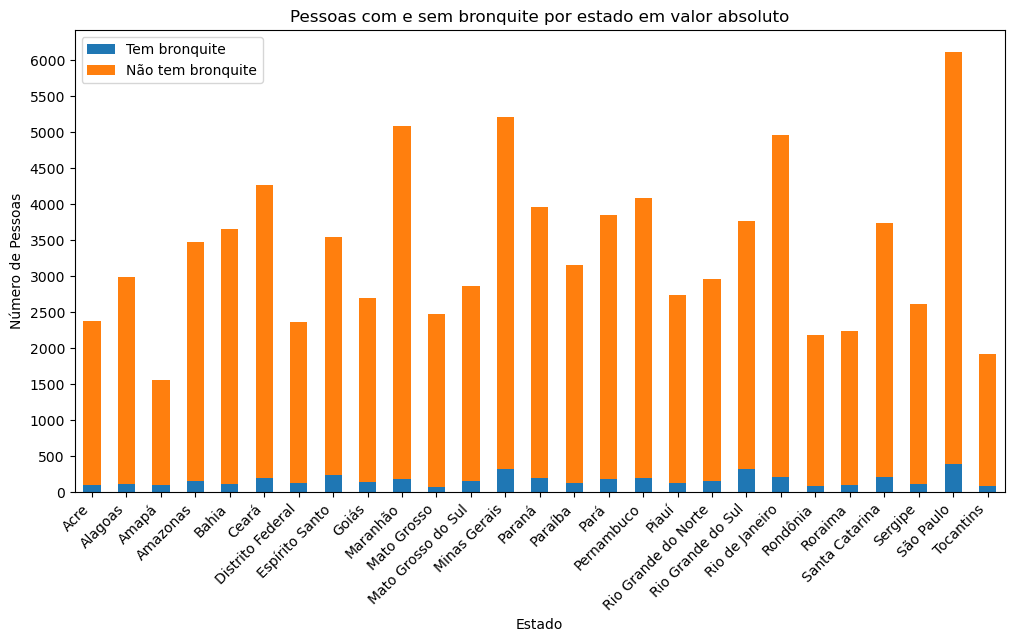

In [17]:
contagem_estados.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Estado')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem bronquite por estado em valor absoluto')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 7000, step=500))
#plt.savefig('Graficos/grafico_bronquite_absoluto.png', dpi=300, bbox_inches='tight')
plt.plot()

In [18]:
i = 0
contagem_estados['Possui bronquite(%)'] = 0
contagem_estados['Nao possui bronquite(%)'] = 0
for index, row in contagem_estados.iterrows():
    QTotal = row[1.0] + row[2.0]
    contagem_estados.iat[i,2] = (row[1.0]/QTotal) * 100
    contagem_estados.iat[i,3] = (row[2.0]/QTotal) * 100
    i += 1

/tmp/ipykernel_6751/3583408121.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.907563025210084' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_estados.iat[i,2] = (row[1.0]/QTotal) * 100
/tmp/ipykernel_6751/3583408121.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '96.09243697478992' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_estados.iat[i,3] = (row[2.0]/QTotal) * 100


In [19]:
contagem_estados

Q074,1.0,2.0,Possui bronquite(%),Nao possui bronquite(%)
V0001,,,,
Acre,93,2287,3.907563,96.092437
Alagoas,116,2871,3.883495,96.116505
Amapá,93,1461,5.984556,94.015444
Amazonas,151,3328,4.340328,95.659672
Bahia,117,3542,3.197595,96.802405
Ceará,200,4065,4.689332,95.310668
Distrito Federal,120,2245,5.073996,94.926004
Espírito Santo,231,3310,6.523581,93.476419
Goiás,146,2556,5.403405,94.596595


[]

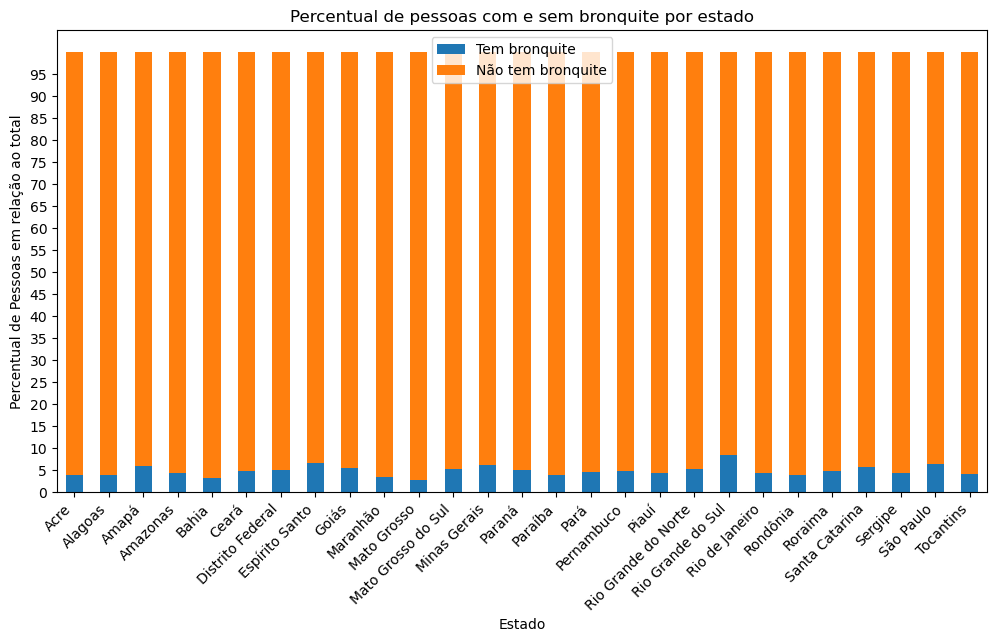

In [20]:
contagem_estados[['Possui bronquite(%)','Nao possui bronquite(%)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Estado')
plt.ylabel('Percentual de Pessoas em relação ao total')
plt.title('Percentual de pessoas com e sem bronquite por estado')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=np.arange(0,100, step=5.0))
#plt.savefig('Graficos/grafico_bronquite_relativo.png', dpi=300, bbox_inches='tight')
plt.plot()

## Por regiao

In [21]:
mapeamento_regiao = {
    'Rondônia': 'Norte',
    'Acre': 'Norte',
    'Amazonas': 'Norte',
    'Roraima': 'Norte',
    'Pará': 'Norte',
    'Amapá': 'Norte',
    'Tocantins': 'Norte',
    'Maranhão': 'Nordeste',
    'Piauí': 'Nordeste',
    'Ceará': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Paraíba': 'Nordeste',
    'Pernambuco': 'Nordeste',
    'Alagoas': 'Nordeste',
    'Sergipe': 'Nordeste',
    'Bahia': 'Nordeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Mato Grosso': 'Centro-Oeste',
    'Goiás': 'Centro-Oeste',
    'Distrito Federal': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Espírito Santo': 'Sudeste',
    'Rio de Janeiro': 'Sudeste',
    'São Paulo': 'Sudeste',
    'Paraná': 'Sul',
    'Santa Catarina': 'Sul',
    'Rio Grande do Sul': 'Sul'
}

In [22]:
regioes = pns.copy()
regioes['V0001'] = pns['V0001'].map(mapeamento_regiao)

In [23]:
contagem_regiao = regioes.groupby(['V0001', 'Q074'], as_index=True)[['V0001']].size().unstack(fill_value=0)

In [24]:
contagem_regiao

Q074,1.0,2.0
V0001,,
Centro-Oeste,480,9918
Nordeste,1319,30225
Norte,785,16817
Sudeste,1153,18677
Sul,730,10742


In [25]:
contagem_regiao.columns

Index([1.0, 2.0], dtype='float64', name='Q074')

[]

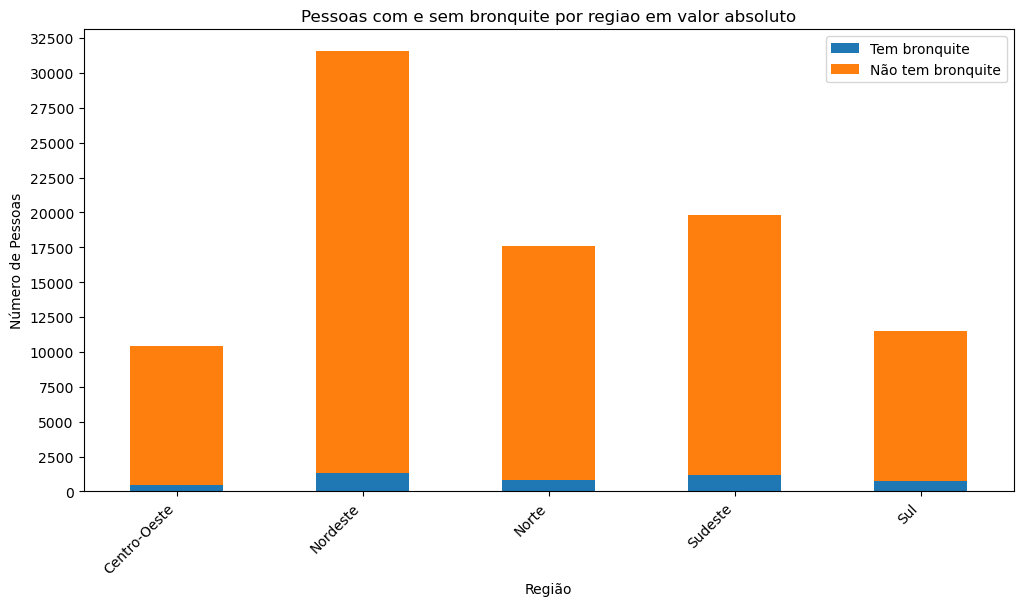

In [26]:
contagem_regiao.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Região')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem bronquite por regiao em valor absoluto')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 35000, 2500))
#plt.savefig('Graficos/grafico_regional_bronquite_absoluto.png', dpi=300, bbox_inches='tight')
plt.plot()

In [27]:
i = 0
contagem_regiao['Possui bronquite(%)'] = 0
contagem_regiao['Nao possui bronquite(%)'] = 0
for index, row in contagem_regiao.iterrows():
    QTotal = row[1.0] + row[2.0]
    contagem_regiao.iat[i,2] = (row[1.0]/QTotal) * 100
    contagem_regiao.iat[i,3] = (row[2.0]/QTotal) * 100
    i += 1

/tmp/ipykernel_6751/2599192803.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.616272360069244' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_regiao.iat[i,2] = (row[1.0]/QTotal) * 100
/tmp/ipykernel_6751/2599192803.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '95.38372763993075' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_regiao.iat[i,3] = (row[2.0]/QTotal) * 100


In [28]:
contagem_regiao

Q074,1.0,2.0,Possui bronquite(%),Nao possui bronquite(%)
V0001,,,,
Centro-Oeste,480,9918,4.616272,95.383728
Nordeste,1319,30225,4.181461,95.818539
Norte,785,16817,4.459720,95.540280
Sudeste,1153,18677,5.814423,94.185577
Sul,730,10742,6.363319,93.636681


[]

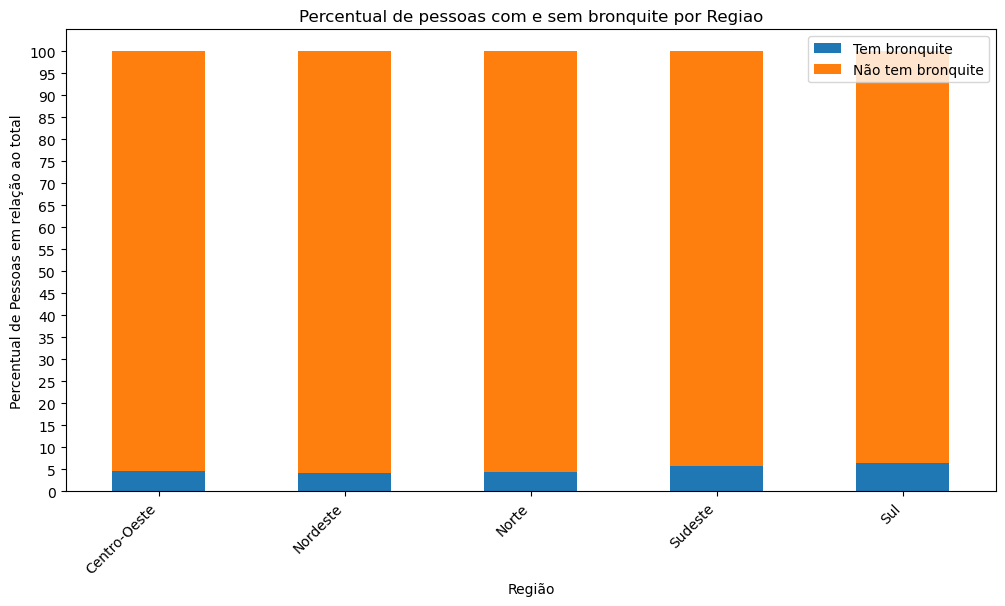

In [29]:
contagem_regiao[['Possui bronquite(%)','Nao possui bronquite(%)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Região')
plt.ylabel('Percentual de Pessoas em relação ao total')
plt.title('Percentual de pessoas com e sem bronquite por Regiao')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 105, 5))
#plt.savefig('Graficos/grafico_regional_bronquite_relativo.png', dpi=300, bbox_inches='tight')
plt.plot()

# ATV 02

## Chi2

In [30]:
pns.head()

,V0001,C008,Q074,Q075
0,Rondônia,55,2.0,NaN
9,Rondônia,19,2.0,NaN
10,Rondônia,45,2.0,NaN
18,Rondônia,58,2.0,NaN
19,Rondônia,28,2.0,NaN


In [31]:
contagem_regiao.reset_index(inplace=True)

In [32]:
contagem_regiao

Q074,V0001,1.0,2.0,Possui bronquite(%),Nao possui bronquite(%)
0,Centro-Oeste,480,9918,4.616272,95.383728
1,Nordeste,1319,30225,4.181461,95.818539
2,Norte,785,16817,4.459720,95.540280
3,Sudeste,1153,18677,5.814423,94.185577
4,Sul,730,10742,6.363319,93.636681


In [33]:
contagem_regiao.describe()

Q074,1.0,2.0,Possui bronquite(%),Nao possui bronquite(%)
count,5.00000,5.000000,5.000000,5.000000
mean,893.40000,17275.800000,5.087039,94.912961
std,338.33312,8165.222024,0.947787,0.947787
min,480.00000,9918.000000,4.181461,93.636681
25%,730.00000,10742.000000,4.459720,94.185577
50%,785.00000,16817.000000,4.616272,95.383728
75%,1153.00000,18677.000000,5.814423,95.540280
max,1319.00000,30225.000000,6.363319,95.818539


In [34]:
contagem_regiao[1.0].sum()

4467

In [35]:
contagem_regiao[2.0].sum()

86379

In [36]:
for index, row in contagem_regiao.iterrows():
    print(row[1.0]+row[2.0])

10398
31544
17602
19830
11472


In [37]:
lista_regioes = list(contagem_regiao['V0001'].values)
lista_regioes

['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

In [38]:
def teste_chi_quadrado(lista):
    for i in range(0,len(lista)):
        for j in range(i+1,len(lista)):
            nome_regiao = lista[i] + "_" + lista[j]
            regioes = contagem_regiao.loc[(contagem_regiao['V0001'] == lista[i]) | (contagem_regiao['V0001'] == lista[j])][[1.0,2.0]]
            chi2, p, dof, expected = stats.chi2_contingency(regioes)
            print(f"Região: {nome_regiao}")
            print("\nResultados do teste de qui-quadrado:")
            print(f"Estatística do teste de qui-quadrado: {chi2}")
            print(f"Valor-p: {p:.20f}")
            print(f"Graus de liberdade: {dof}")
            print("Tabela de frequências esperadas:")
            print(expected)
            if p < 0.01:
                print("Hipotese nula rejeitada")
            else:
                print("Hipotese nula aceita")
            print("\n===============================================\n")

In [39]:
teste_chi_quadrado(lista_regioes)

Região: Centro-Oeste_Nordeste

Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadrado: 3.496309067859852
Valor-p: 0.06150576340514560258
Graus de liberdade: 1
Tabela de frequências esperadas:
[[  445.99690048  9952.00309952]
 [ 1353.00309952 30190.99690048]]
Hipotese nula aceita


Região: Centro-Oeste_Norte

Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadrado: 0.33597280099111587
Valor-p: 0.56216307312259150564
Graus de liberdade: 1
Tabela de frequências esperadas:
[[  469.76678571  9928.23321429]
 [  795.23321429 16806.76678571]]
Hipotese nula aceita


Região: Centro-Oeste_Sudeste

Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadrado: 18.92770805477041
Valor-p: 0.00001357663964988672
Graus de liberdade: 1
Tabela de frequências esperadas:
[[  561.72866217  9836.27133783]
 [ 1071.27133783 18758.72866217]]
Hipotese nula rejeitada


Região: Centro-Oeste_Sul

Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadr

## Analise por idade

In [40]:
def grafico_idade(df):
    ax = df.plot(kind='bar', stacked=True, figsize=(12, 6))

    for i, v in enumerate(df):
        ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12, color='black')
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, df.max(), step=df.max()/25))

In [41]:
def grafico_idade_frequencia(df):
    frequencia_acumulada = df.cumsum()

    ax = df.plot(kind='bar', stacked=True, figsize=(12, 6))
    frequencia_acumulada.plot(kind='line', marker='o', color='red', linewidth=2, label='Frequência Acumulada')

    for i, v in enumerate(df):
        ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12, color='black')
        
    for i, v in enumerate(frequencia_acumulada):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12, color='black')
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, df.sum(), step=df.sum()/25))
    #plt.savefig('Graficos/grafico_bronquite_absoluto.png', dpi=300, bbox_inches='tight')

In [42]:
bins = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['0-10','11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110']

### Total

In [43]:
pns.describe()

,C008,Q074,Q075
count,90846.000000,90846.000000,4467.000000
mean,46.394855,1.950829,16.822028
std,17.597113,0.216226,18.272858
min,15.000000,1.000000,0.000000
25%,32.000000,2.000000,4.000000
50%,45.000000,2.000000,10.000000
75%,60.000000,2.000000,25.000000
max,107.000000,2.000000,94.000000


In [44]:
tmp = pns.copy()
tmp['Faixa Etaria'] = pd.cut(pns['C008'], bins=bins, labels=labels,right=False)
contagem_idade = tmp.groupby('Faixa Etaria').size()

/tmp/ipykernel_6751/1701878012.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_idade = tmp.groupby('Faixa Etaria').size()


In [45]:
contagem_idade

Faixa Etaria
0-10           0
11-20       4336
21-30      13373
31-40      18150
41-50      16602
51-60      15657
61-70      12555
71-80       7157
81-90       2580
91-100       413
101-110       23
dtype: int64

In [46]:
contagem_idade.sum()

90846

[]

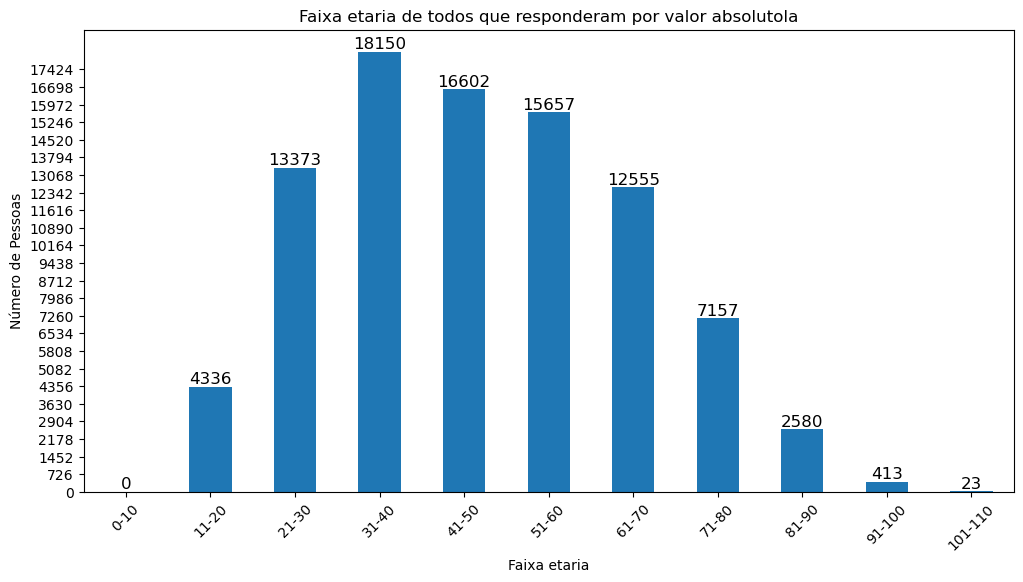

In [47]:
grafico_idade(contagem_idade)
plt.xlabel('Faixa etaria')
plt.ylabel('Número de Pessoas')
plt.title('Faixa etaria de todos que responderam por valor absolutola')
plt.plot()

[]

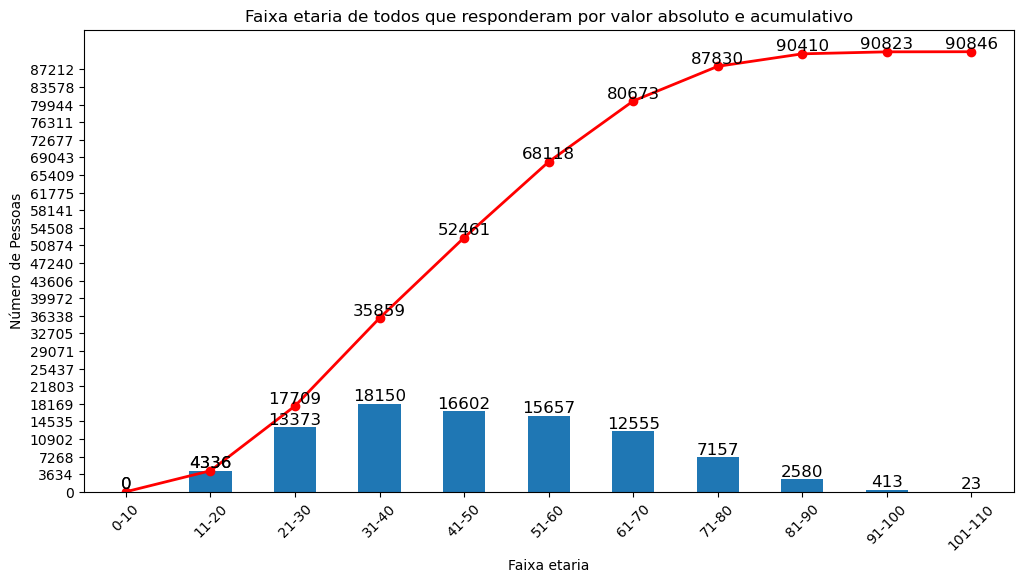

In [48]:
grafico_idade_frequencia(contagem_idade)
plt.xlabel('Faixa etaria')
plt.ylabel('Número de Pessoas')
plt.title('Faixa etaria de todos que responderam por valor absoluto e acumulativo')
plt.plot()

### Quando recebeu diagnostico

In [49]:
pns

,V0001,C008,Q074,Q075
0,Rondônia,55,2.0,NaN
9,Rondônia,19,2.0,NaN
10,Rondônia,45,2.0,NaN
18,Rondônia,58,2.0,NaN
19,Rondônia,28,2.0,NaN
...,...,...,...,...
293709,Distrito Federal,54,2.0,NaN
293712,Distrito Federal,44,2.0,NaN
293713,Distrito Federal,32,2.0,NaN
293718,Distrito Federal,54,2.0,NaN


In [50]:
tmp = pns.copy()
tmp['V0001'] = pns['V0001'].map(mapeamento_regiao)

In [51]:
tmp = tmp.dropna(subset=['Q075'])

In [52]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4467 entries, 62 to 293702
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   4467 non-null   object 
 1   C008    4467 non-null   int64  
 2   Q074    4467 non-null   float64
 3   Q075    4467 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 174.5+ KB


In [53]:
tmp.describe()

,C008,Q074,Q075
count,4467.000000,4467.0,4467.000000
mean,44.072980,1.0,16.822028
std,17.832367,0.0,18.272858
min,15.000000,1.0,0.000000
25%,30.000000,1.0,4.000000
50%,42.000000,1.0,10.000000
75%,58.000000,1.0,25.000000
max,100.000000,1.0,94.000000


In [54]:
tmp['Faixa Etaria'] = pd.cut(pns['Q075'], bins=bins, labels=labels,right=False)
contagem_idade_regiao = tmp.groupby(['V0001', 'Faixa Etaria']).size().unstack(fill_value=0)

/tmp/ipykernel_6751/4033771688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_idade_regiao = tmp.groupby(['V0001', 'Faixa Etaria']).size().unstack(fill_value=0)


18.94375
18.69151176906093


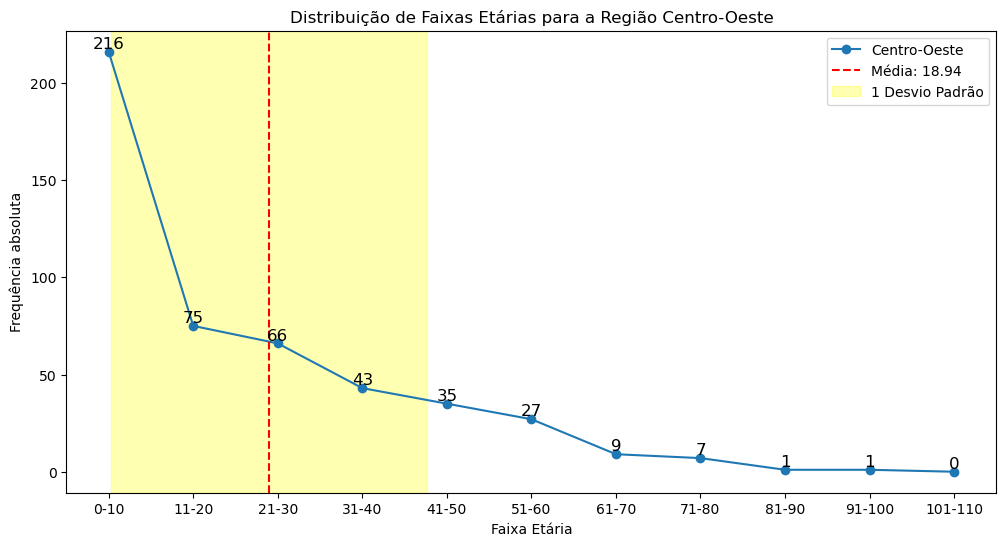

16.521607278241092
17.892172697821998


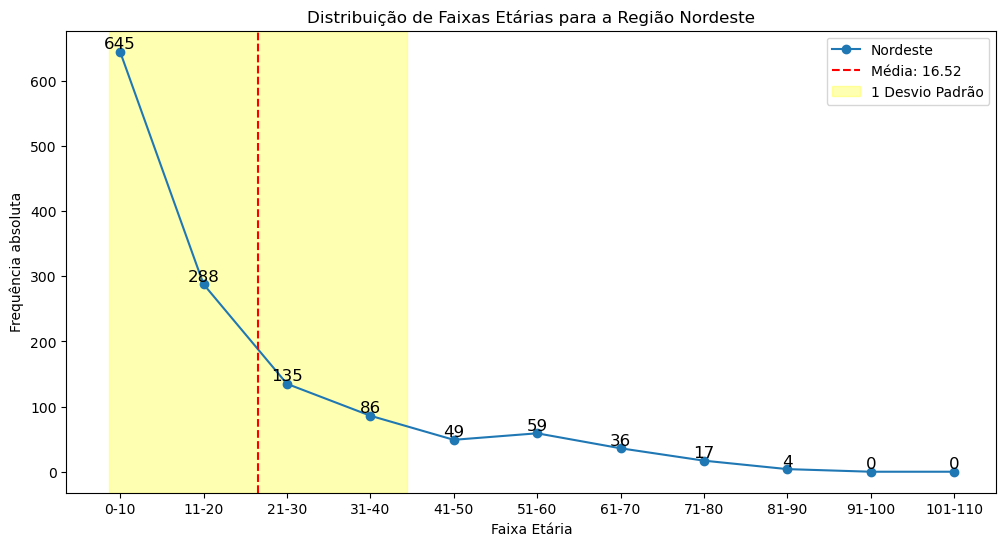

13.021656050955414
14.775903916164047


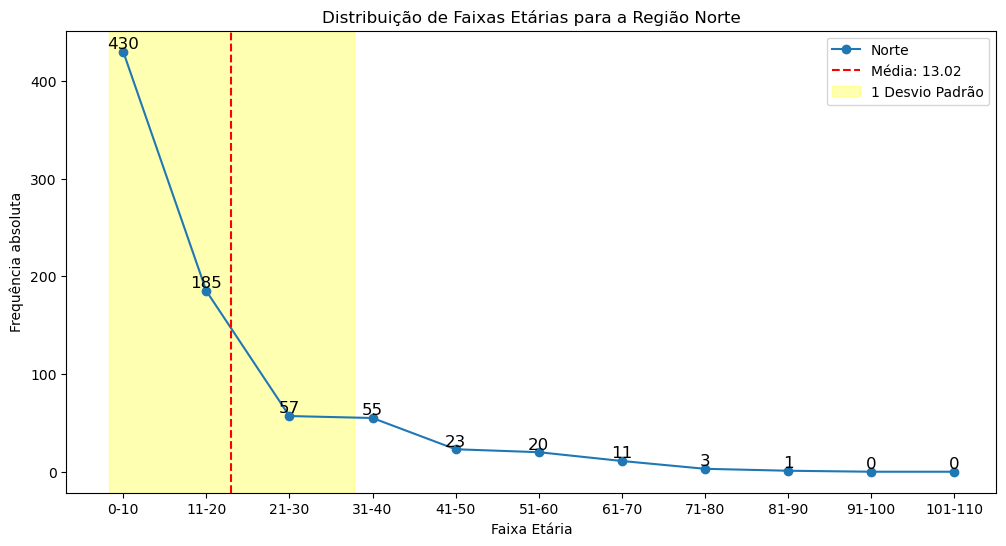

17.220294882914136
18.979019051286063


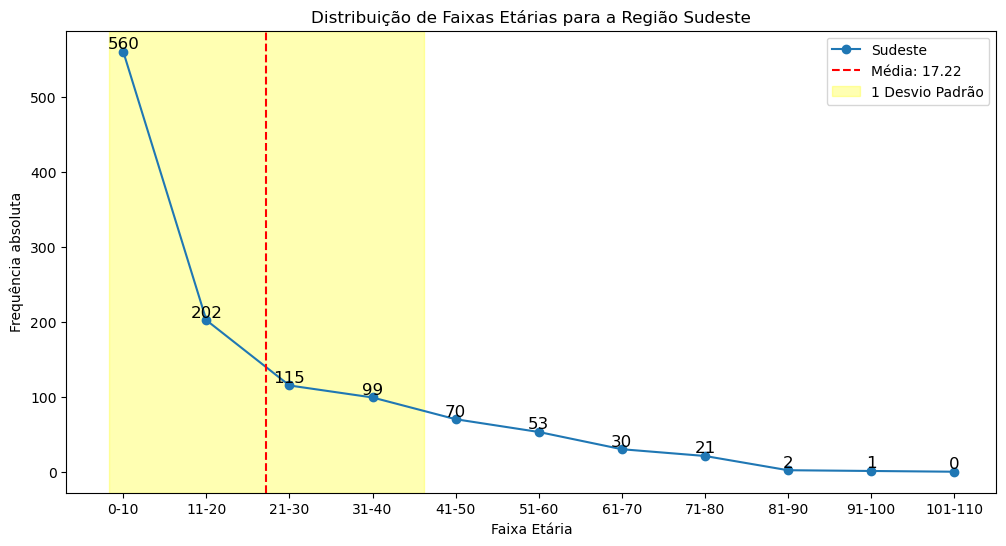

19.427397260273974
20.185241320166412


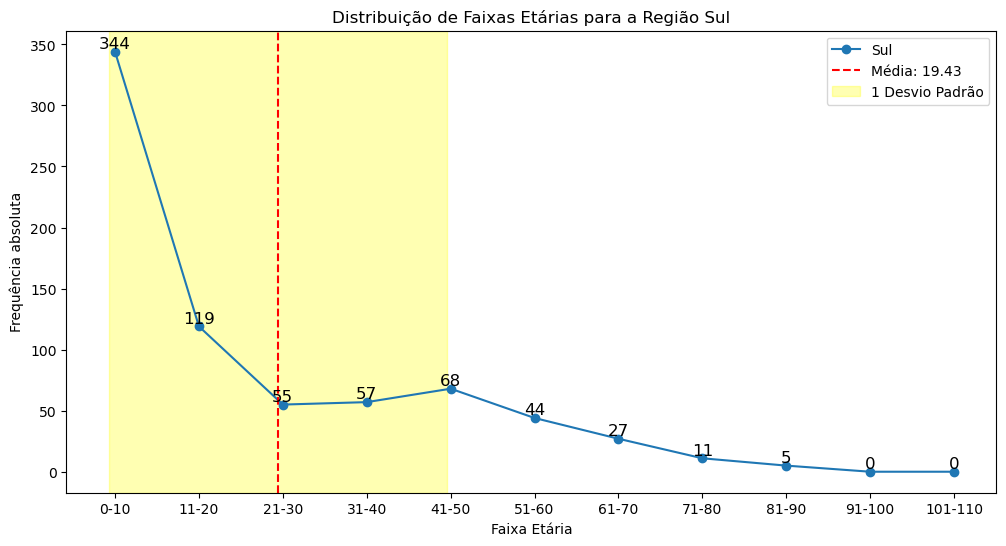

In [74]:
def calcular_media_desvio(df, regiao):
    idades = df[df['V0001'] == regiao]['Q075']
    media = idades.mean()
    desvio_padrao = idades.std()
    return media, desvio_padrao

for regiao in contagem_idade_regiao.index:
    contagem_idade_regiao.loc[regiao].plot(kind='line', marker='o', figsize=(12, 6))
    
    media, desvio_padrao = calcular_media_desvio(tmp, regiao)
    plt.axvline(x=media/10, color='red', linestyle='--', label=f'Média: {media:.2f}')
    print(media)
    print(desvio_padrao)
    
    plt.axvspan((media - desvio_padrao)/10, (media + desvio_padrao)/10, color='yellow', alpha=0.3, label='1 Desvio Padrão')
    plt.title(f'Distribuição de Faixas Etárias para a Região {regiao}')
    plt.xlabel('Faixa Etária')
    plt.ylabel('Frequência absoluta')
    plt.xticks(rotation=0,ticks=range(len(contagem_idade_regiao.columns)), labels=labels)
    
    for i, v in enumerate(contagem_idade_regiao.loc[regiao]):
        plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12, color='black')
    
    plt.legend()
    # Exibindo o gráfico
    plt.savefig(f'Graficos/dist_faixas_etarias_{regiao}', dpi=300, bbox_inches='tight')
    plt.show()


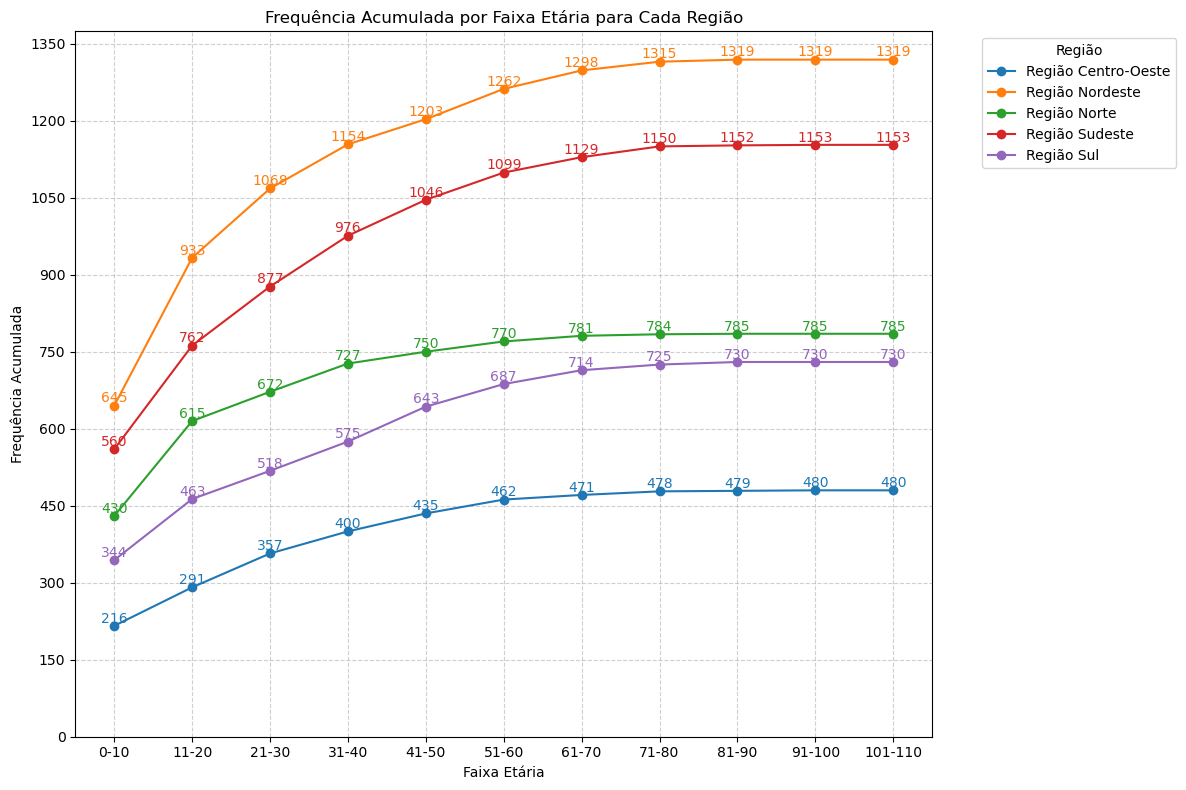

In [ ]:
plt.figure(figsize=(12, 8))

for regiao in contagem_idade_regiao.index:
    frequencia_acumulada = contagem_idade_regiao.loc[regiao].cumsum()
    
    linha, =plt.plot(frequencia_acumulada, marker='o', label=f'Região {regiao}')
    for x, y in enumerate(frequencia_acumulada):
        plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10, color=linha.get_color())

plt.title('Frequência Acumulada por Faixa Etária para Cada Região')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência Acumulada')
plt.yticks(np.arange(0, 1400, step=150))
plt.xticks(rotation=0) 

plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.savefig(f'Graficos/frequencia_acumulativa_regioes', dpi=300, bbox_inches='tight')
plt.show()